In [39]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
data_frame = pd.read_csv('ausgaben.csv', parse_dates=['date'])

In [41]:
data_frame = data_frame.set_index('date')

In [42]:
total = data_frame['amount'].sum()

In [43]:
per_month = pd.DataFrame(data_frame.groupby([pd.TimeGrouper(freq='M')])['amount'].sum().reset_index())
print(per_month)

        date   amount
0 2016-01-31  1547.52
1 2016-02-29  2066.60
2 2016-03-31  1648.05
3 2016-04-30  1173.86


In [44]:
per_category = pd.DataFrame(data_frame.groupby('category')['amount'].sum())
per_category['percent'] = round((per_category['amount'] / total) * 100, 2)
print(per_category)

               amount  percent
category                      
Arznei          10.00     0.16
Beruf          936.94    14.56
Freizeit      1363.70    21.19
Haushalt       180.62     2.81
Kleidung       104.90     1.63
Lebensmittel   788.22    12.25
Miete         1495.00    23.23
Restaurant     845.70    13.14
Sonstiges        0.70     0.01
Transport      584.25     9.08
Versicherung   126.00     1.96


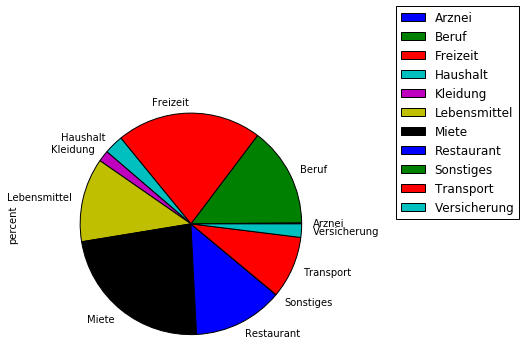

In [45]:
per_category_pie = per_category.plot.pie(y='percent')
per_category_pie.axis('equal')
per_category_pie.legend(loc='center right', bbox_to_anchor=(1.5, 1))

In [118]:
per_month_and_category = data_frame


def percent_per_month(row):
    month_index = int(row['month'].split('-')[1]) - 1
    month_expenses = per_month['amount'][month_index]
    return round((row['amount'] / month_expenses) * 100)

def get_month(row):
    return '-'.join([str(row['date'].year), str(row['date'].month)])

per_month_and_category = per_month_and_category.reset_index()
per_month_and_category['month'] = per_month_and_category.apply(get_month, axis=1)

per_month_and_category = per_month_and_category.groupby(['month', 'category'])['amount'].sum()
per_month_and_category = pd.DataFrame(per_month_and_category)
per_month_and_category = per_month_and_category.reset_index()
per_month_and_category['percent'] = per_month_and_category.apply(percent_per_month, axis=1)

print(per_month_and_category)

     month      category  amount  percent
0   2016-1         Beruf  111.54      7.0
1   2016-1      Freizeit  518.80     34.0
2   2016-1      Haushalt   49.62      3.0
3   2016-1      Kleidung  104.90      7.0
4   2016-1  Lebensmittel  164.16     11.0
5   2016-1         Miete  350.00     23.0
6   2016-1    Restaurant  207.80     13.0
7   2016-1     Transport    9.20      1.0
8   2016-1  Versicherung   31.50      2.0
9   2016-2         Beruf  682.50     33.0
10  2016-2      Freizeit  335.00     16.0
11  2016-2      Haushalt   15.00      1.0
12  2016-2  Lebensmittel  239.00     12.0
13  2016-2         Miete  350.00     17.0
14  2016-2    Restaurant  149.40      7.0
15  2016-2     Sonstiges    0.70      0.0
16  2016-2     Transport  263.50     13.0
17  2016-2  Versicherung   31.50      2.0
18  2016-3        Arznei   10.00      1.0
19  2016-3         Beruf  128.00      8.0
20  2016-3      Freizeit  240.50     15.0
21  2016-3      Haushalt  116.00      7.0
22  2016-3  Lebensmittel  250.25  

In [174]:
category_time_series = per_month_and_category.pivot(index="month", columns="category", values="amount")
category_time_series = category_time_series.fillna(0)
# category_time_series.reset_index()
# print(category_time_series)

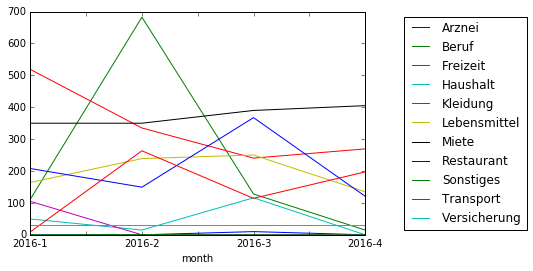

In [173]:
# my_colors = [(x/20.0, x/10.0, 0.3) for x in range(len(category_time_series.columns))]
# print(my_colors)
lines = category_time_series.plot()
lines.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))